In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/elijahwoolford/Desktop/UNRATE.csv")
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


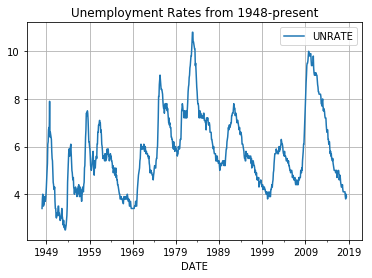

In [4]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title("Unemployment Rates from 1948-present")
plt.grid(True)
plt.show()

Text(0.5,1,'Unemployemt Pace')

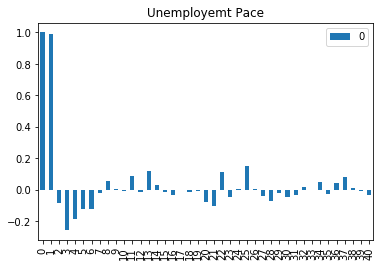

In [5]:
x = pd.DataFrame(pacf(df["UNRATE"]))
x.plot(kind='bar')
plt.title("Unemployemt Pace")

In [8]:
model = ARIMA(df["UNRATE"], order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  846
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 123.517
Method:                           css   S.D. of innovations              0.209
Date:                Wed, 08 Aug 2018   AIC                           -243.034
Time:                        20:49:52   BIC                           -233.553
Sample:                    02-01-1948   HQIC                          -239.402
                         - 07-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.007      0.082      0.934      -0.013       0.015
Residuals Description
count    8.460000e+02
mean     4.654595e-10
std      2.092243e-01
min     -1.500591e+00
25%     -1.005910e-01

In [9]:
model = ARIMA(df["UNRATE"], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  846
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 129.761
Method:                       css-mle   S.D. of innovations              0.208
Date:                Thu, 09 Aug 2018   AIC                           -253.522
Time:                        21:00:28   BIC                           -239.301
Sample:                    02-01-1948   HQIC                          -248.073
                         - 07-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.008      0.079      0.937      -0.015       0.017
ar.L1.D.UNRATE     0.1213      0.034      3.547      0.000       0.054       0.188
                                    

In [11]:
forecast = model_fit.forecast()[0]
forecast

array([3.88843673])